##Importando Librerias 

In [ ]:
import pandas as pd
import sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creacion de las tablas como data frames

In [ ]:
database = "../data/raw/database.sqlite"
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

conn.close()
tables



conn = sqlite3.connect(database)


dict_tables_db = {}
lista_no_tablas = ['sqlite_sequence']
for tabletmp in tables.name:
    if tabletmp not in lista_no_tablas:
        query = "SELECT * from %s"%tabletmp
        print(query)
        dict_tables_db[tabletmp] = pd.read_sql_query(query, conn)


conn.close()


[display(x) for x in dict_tables_db.values()]

In [ ]:
# Iterando sobre el diccionario que contiene las tablas 

In [ ]:
for key,tabletbp in dict_tables_db.items():
    print(key)

In [ ]:
#Resuemn de lo que contiene cada tabla 

In [ ]:
for key,tabletbp in dict_tables_db.items():
    print(key)
    print(tabletbp.shape)
    display(tabletbp.describe())

In [ ]:
#este si es el df para cada tabla

In [ ]:
df_player_atr = dict_tables_db['Player_Attributes']
df_player = dict_tables_db['Player']
df_match = dict_tables_db['Match']
df_league = dict_tables_db['League']
df_country = dict_tables_db['Country']
df_team = dict_tables_db['Team']
df_team_atr = dict_tables_db['Team_Attributes']

In [ ]:
#en estas llaves se unen las tablas objetivo
[x for x in df_player_atr.columns if x in df_player.columns]

In [ ]:
df_team.columns

In [ ]:
#Join de las tablas df_player_atr y df_player

In [ ]:
df_player_atr['penalties']

In [ ]:
df_player.head()

In [ ]:
#las llaves son player_api_id y player_fifa_api_id (se llaman igual en ambas tablas


df_players = df_player_atr[['player_fifa_api_id', 'player_api_id', 'date', 'overall_rating','potential', 'preferred_foot', 'attacking_work_rate','defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']].merge(
    df_player[['player_fifa_api_id','player_api_id','height','weight']],
    how='left',left_on='player_fifa_api_id', right_on = 'player_fifa_api_id'
)




In [ ]:

#distintos valores en cada columna
valores_unicos = {col: df_players[col].unique() for col in df_players.columns}
valores_unicos


In [81]:
#group by para ver valores distintos en las col attacking y defensive

df_players['attacking_work_rate'].value_counts()

#proporcion = (89+104+106+348)/(3639+8569+42823+125070)
#proporcion = 0.003592428692789046

attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: count, dtype: int64

In [ ]:
df_players[df_players['overall_rating'].isna()]

In [87]:
df_players_clean = df_players.dropna(subset=['overall_rating'])
df_players_clean

,player_fifa_api_id,player_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_api_id_y,height,weight
0,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0
1,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0
2,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0
3,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,505942.0,182.88,187.0
4,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,505942.0,182.88,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,39902.0,180.34,176.0
183974,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0
183975,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0
183976,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0


In [92]:
df_players_clean = df_players[df_players['attacking_work_rate'].isin(['medium', 'high', 'low', 'None'])]
df_players_clean['attacking_work_rate'].value_counts()

attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
Name: count, dtype: int64

In [95]:
df_players_clean = df_players[df_players['defensive_work_rate'].isin(['medium', 'high', 'low', 'o'])]
df_players_clean['defensive_work_rate'].value_counts()

defensive_work_rate
medium    130846
high       27041
low        18432
o           1550
Name: count, dtype: int64

In [98]:
#distintos valores en cada columna
#valores_unicos = {col: df_players_clean[col].unique() for col in df_players_clean.columns}
#valores_unicos

df_players_clean.dtypes

player_fifa_api_id       int64
player_api_id_x          int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

<Axes: >

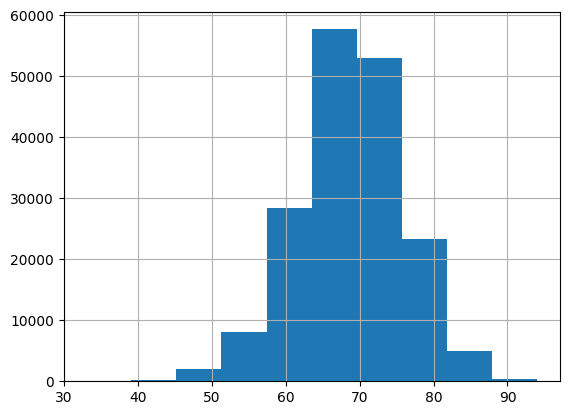

In [99]:
df_players_clean['overall_rating'].hist()

In [100]:
df_players['overall_rating'].median()

69.0

In [ ]:
#Cambios de variables categoricas a valores numericos

In [96]:
dict_categorias_preferred_foot = {
    1:'right',
    0:'left'
}


dict_categorias_attacking_work_rate = {
    'high':2,
    'low':-1,
    'medium':1,
     None:0
}


dict_categorias_defensive_work_rate = {
    'high':2,
    'medium':1,
    'o':0,
    'low':-1
}

In [ ]:
#Creacion de la variable target

In [ ]:
df_players_clean.loc[:, 'target_variable'] = df_players_clean['overall_rating'].apply(lambda x: 1 if x >= 70 else 0)
df_players_clean

In [ ]:
#Split de los datos, para no generar likecht eliminamos overall_rating de la estamos usando para crear la variable target


feature_cols = ['player_fifa_api_id',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes','player_name', 'birthday', 'height',
       'weight']
X = df_players_clean[feature_cols] # Features
y = df_players_clean.target_variable # Target variable

In [ ]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
logreg


In [ ]:
# fit the model with data
logreg.fit(X_train, y_train)

